In [1]:
import sys

#sys.path.append("../../smt_modules")
sys.path.insert(0, "../../")
import glob, os
import pyicon as pyic
import smt_modules.all_funcs as eva
from smt_modules.icon_smt_levels import dzw, dzt, depthc, depthi
import smt_modules.tools as tools

import pandas as pd
import netCDF4 as nc
import xarray as xr    
from dask.diagnostics import ProgressBar
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
import cartopy.crs as ccrs
ccrs_proj = ccrs.PlateCarree()
import gsw
from importlib import reload

-----calc
sys glob os
numpy
netcdf
Done modules calc.
-----calc_xr
sys glob os
numpy
netcdf
xarray
Done modules calc.
-----tb
sys
json
numpy
scipy
netcdf datetime
matplotlib
mybreak
pnadas
xarray
done xarray
-----IconData
-----plotting
-----accessor
-----view
-----calc
-----calc_xr
-----tb
-----IconData
-----plotting
-----accessor
-----view
-----quickplots
-----quickplots
Load my smt functions


In [2]:
#Reload modules:
reload(eva)
reload(tools)

Load my smt functions


<module 'smt_modules.tools' from '/home/m/m300878/submesoscaletelescope/notebooks/november22/../../smt_modules/tools.py'>

In [3]:
lon_reg_R0    = [-80.5, -55]
lat_reg_R0    = [25, 40]
fpath_ckdtree = '/work/mh0033/m300602/icon/grids/smt/ckdtree/rectgrids/smt_res0.02_180W-180E_90S-90N.nc'
fig_path      = '/home/m/m300878/submesoscaletelescope/notebooks/images/eval_ri/front/12_fronts_modified/'
path_root_dat = '/work/mh0033/m300878/parameterization/time_averages/one_week_march/'
lon_reg       = lon_reg_R0
lat_reg       = lat_reg_R0
time_averaged = ''

In [4]:
#calculate MLD
path_data     = f'{path_root_dat}t{time_averaged}.nc'
t_mean        = xr.open_dataset(path_data, chunks=dict(depthc=1))
path_data     = f'{path_root_dat}s{time_averaged}.nc'
s_mean        = xr.open_dataset(path_data, chunks=dict(depthc=1))
data_t_mean   = pyic.interp_to_rectgrid_xr(t_mean, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_s_mean   = pyic.interp_to_rectgrid_xr(s_mean, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_rho_mean = gsw.rho(data_s_mean.S001_sp, data_t_mean.T001_sp, depthc[2])
data_rho_mean_depthi = data_rho_mean.interp(depthc=depthi)

mld, mask, mldx = eva.calc_mld_xr(data_rho_mean_depthi, depthi)
mask      = mask.rename(depthc='depthi')

data_t_mean_depthi = data_t_mean.T001_sp.interp(depthc=depthi)
data_t_mean_depthi = data_t_mean_depthi.rename(depthc='depthi')
a         = data_t_mean_depthi.isel(depthi=1).where(~(data_t_mean_depthi.isel(depthi=1)==0), np.nan)
mask_land = ~np.isnan(a)
mask_land = mask_land.where(mask_land==True, np.nan)
mldx      = mldx * mask_land
mldx      = mldx.rename('mld')


#calculate Ri
path_data      = f'{path_root_dat}bx{time_averaged}.nc'
dbdx_mean      = xr.open_dataset(path_data, chunks=dict(depthi=1))
path_data      = f'{path_root_dat}by{time_averaged}.nc'
dbdy_mean      = xr.open_dataset(path_data, chunks=dict(depthi=1))
path_data      = f'{path_root_dat}n2{time_averaged}.nc'
n_mean         = xr.open_dataset(path_data, chunks=dict(depthi=1))
data_dbdx_mean = pyic.interp_to_rectgrid_xr(dbdx_mean.dbdx, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_dbdy_mean = pyic.interp_to_rectgrid_xr(dbdy_mean.dbdy, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_n2_mean   = pyic.interp_to_rectgrid_xr(n_mean.N2, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg)
data_M2_mean   = np.sqrt(np.power(data_dbdx_mean,2) + np.power(data_dbdy_mean,2))

ri_mean = eva.calc_richardsonnumber(data_n2_mean.lat, data_n2_mean, data_dbdy_mean)

path_data          = f'{path_root_dat}wb{time_averaged}_prime.nc'
wb_prime_mean      = xr.open_dataset(path_data, chunks=dict(depthi=1))
wb_prime_mean      = wb_prime_mean.rename(__xarray_dataarray_variable__='wb_prime_mean')
data_wb_prime_mean = pyic.interp_to_rectgrid_xr(wb_prime_mean.wb_prime_mean, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg) #week


path_data          = f'{path_root_dat}vb{time_averaged}_prime.nc'
vb_prime_mean      = xr.open_dataset(path_data, chunks=dict(depthc=1))
vb_prime_mean      = vb_prime_mean.rename(__xarray_dataarray_variable__='vb_prime_mean')
data_vb_prime_mean = pyic.interp_to_rectgrid_xr(vb_prime_mean.vb_prime_mean, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg) #week

data_vb_prime_mean_depthi = data_vb_prime_mean.interp(depthc=depthi)
data_vb_prime_mean_depthi = data_vb_prime_mean_depthi.rename(depthc='depthi')

path_data          = f'{path_root_dat}ub{time_averaged}_prime.nc'
ub_prime_mean      = xr.open_dataset(path_data, chunks=dict(depthc=1))
ub_prime_mean      = ub_prime_mean.rename(__xarray_dataarray_variable__='ub_prime_mean')
data_ub_prime_mean = pyic.interp_to_rectgrid_xr(ub_prime_mean.ub_prime_mean, fpath_ckdtree, lon_reg=lon_reg, lat_reg=lat_reg) #week

data_ub_prime_mean_depthi = data_ub_prime_mean.interp(depthc=depthi)
data_ub_prime_mean_depthi = data_ub_prime_mean_depthi.rename(depthc='depthi')

In [5]:
mask_used = mask_land # * mask
mldx_used = mldx
n2_sel    = data_n2_mean

m2_sel  = data_M2_mean
m2x_sel = data_dbdx_mean
m2y_sel = data_dbdy_mean

In [6]:
#### Filter
m2_min_lim = 0#5e-8

m2         = m2_sel.where(np.abs(m2_sel) > m2_min_lim, np.nan)
m2         = m2.where(~np.isinf(m2),np.nan) #infs to nans
m2_mask    = m2 * mask_used
m2_mask    = m2_mask.where(~(m2_mask == 0), np.nan) # remove zeros
m2_mask    = m2_mask.rename('m2')

m2x      = m2x_sel.where(np.abs(m2x_sel) > m2_min_lim, np.nan)
m2x      = m2x.where(~np.isinf(m2x),np.nan) #infs to nans
m2x_mask = m2x * mask_used 
m2x_mask = m2x_mask.where(~(m2x_mask == 0), np.nan) # remove zeros
m2x_mask = m2x_mask.rename('m2x')

m2y      = m2y_sel.where(np.abs(m2y_sel) > m2_min_lim, np.nan)
m2y      = m2y.where(~np.isinf(m2y),np.nan) #infs to nans
m2y_mask = m2y * mask_used 
m2y_mask = m2y_mask.where(~(m2y_mask == 0), np.nan) # remove zeros
m2y_mask = m2y_mask.rename('m2y')

# n2
n2      = n2_sel.where(~np.isinf(n2_sel),np.nan) #infs to nans
n2_mask = n2 * mask_used  #application of mask leads to new zero values
n2_mask = n2_mask.where(~(n2_mask == 0), np.nan) # remove zeros
n2_mask = n2_mask.rename('n2')

wb_mask = data_wb_prime_mean * mask_used 
wb_mask = wb_mask.where(~(wb_mask == 0), np.nan) # remove zeros
wb_mask = wb_mask.rename('wb')

vb_mask = data_vb_prime_mean_depthi * mask_used
vb_mask = vb_mask.where(~(m2_mask == 0), np.nan) # remove zeros
vb_mask = vb_mask.rename('vb')

ub_mask = data_ub_prime_mean_depthi * mask_used
ub_mask = ub_mask.where(~(m2_mask == 0), np.nan) # remove zeros
ub_mask = ub_mask.rename('ub')

In [7]:
reload(eva)
lon_reg_all, lat_reg_all = eva.get_new_fronts()
shape = lon_reg_all.shape

fronts = xr.IndexVariable('fronts', np.array(np.arange(shape[0])+1))
M   = []
Mx  = []
My  = []
N   = []
WB  = []
UB  = []
VB  = []
MLD = []
LAT = []
for ii in np.arange(shape[0]):
    # ii=11
    front =             f'R{ii+1}f'
    lon_front = lon_reg_all[ii,:]
    lat_front = lat_reg_all[ii,:]

    #select fronts values and average over mld - save diagnostic values m2 n2 wb and mld
    m2_diag   = m2_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    m2x_diag  = m2x_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    m2y_diag  = m2y_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    n2_diag   = n2_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    wb_diag   = wb_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    vb_diag   = vb_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    ub_diag   = ub_mask.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))
    mldx_diag = mldx.sel(lat=slice(lat_front[0],lat_front[1])).sel(lon=slice(lon_front[0],lon_front[1]))

    #average 
    m2_diag_ave  = m2_diag.mean(dim=['lat', 'lon'])
    m2x_diag_ave = m2x_diag.mean(dim=['lat', 'lon'])
    m2y_diag_ave = m2y_diag.mean(dim=['lat', 'lon'])
    n2_diag_ave  = n2_diag.mean(dim=['lat', 'lon'])
    wb_diag_ave  = wb_diag.mean(dim=['lat', 'lon'])
    vb_diag_ave  = vb_diag.mean(dim=['lat', 'lon'])
    ub_diag_ave  = ub_diag.mean(dim=['lat', 'lon'])
    mldx_ave     = mldx_diag.mean(dim=['lat', 'lon'])

    LAT.append( m2_diag.lat.mean() )
    M.append(m2_diag_ave)
    Mx.append(m2x_diag_ave)
    My.append(m2y_diag_ave)
    N.append(n2_diag_ave)
    WB.append(wb_diag_ave)
    VB.append(vb_diag_ave)
    UB.append(ub_diag_ave)
    MLD.append(mldx_ave)

    # save background state values of each front
ds_M  = xr.concat(M, dim=fronts)
ds_Mx = xr.concat(Mx, dim=fronts)
ds_My = xr.concat(My, dim=fronts)
ds_N  = xr.concat(N, dim=fronts)
ds_WB = xr.concat(WB, dim=fronts)
ds_VB = xr.concat(VB, dim=fronts)
ds_UB = xr.concat(UB, dim=fronts)
ds_mld= xr.concat(MLD, dim=fronts)
ds_lat= xr.concat(LAT, dim=fronts)

ds_F = xr.merge([ds_M, ds_Mx, ds_My, ds_N, ds_WB, ds_VB, ds_UB, ds_mld, ds_lat])

Load my smt functions


In [8]:
# calculate fox kemper and stone param from diagnosed backround values
reload(eva)
mld_manu = np.array([450, 400, 180, 500, 300, 400, 300, 180,  250, 480 ])
aa = ds_F
AA = []
for ii in np.arange(shape[0]):
    # AA.append(aa.isel(fronts=ii).sel(depthi=slice(0, aa.isel(fronts=ii).mld)))
    AA.append(aa.isel(fronts=ii).sel(depthi=slice(0, mld_manu[ii])))

ds_AA = xr.concat(AA, dim = fronts)

A             = ds_AA
ri_diag       = eva.calc_richardsonnumber(A.lat, A.n2, A.m2y)
psi_diag_held = eva.calc_streamfunc_held_schneider(A.wb, A.m2x, A.m2y)
grad_b        = eva.calc_abs_grad_b(A.m2x, A.m2y, A.n2)

psi_diag_full        = eva.calc_streamfunc_full(A.wb, A.m2y, A.vb, A.n2, grad_b)
psi_diag_traditional = eva.calc_streamfunc(A.vb, A.n2)

x       = A.mld
x[:]    = mld_manu
mld_sel = x # A.mld
cs      = 0.5
psi_fox_brg   = eva.calc_psi_fox_brueggemann(A.lat, mld_sel, A.m2y, -A.m2y.depthi, structure=True)
psi_stone_brg = eva.calc_psi_stone_brueggemann(A.lat, mld_sel, A.m2y, ri_diag, cs, -A.m2y.depthi, structure=True)

psi_fox_fox   = eva.calc_psi_fox_fox(A.lat, mld_sel, A.m2y, -A.m2y.depthi, structure=True)
psi_stone_fox = eva.calc_psi_stone_fox(A.lat, mld_sel, A.m2y, ri_diag, cs, -A.m2y.depthi, structure=True)

Load my smt functions


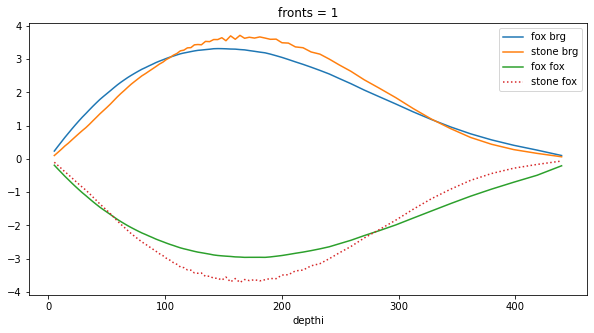

In [9]:
fig = plt.figure(figsize=(10,5))
i=0
psi_fox_brg.isel(fronts=i).plot(label='fox brg')
psi_stone_brg.isel(fronts=i).plot(label='stone brg')

psi_fox_fox.isel(fronts=i).plot(label='fox fox')
psi_stone_fox.isel(fronts=i).plot(label='stone fox', ls=':')
plt.legend()

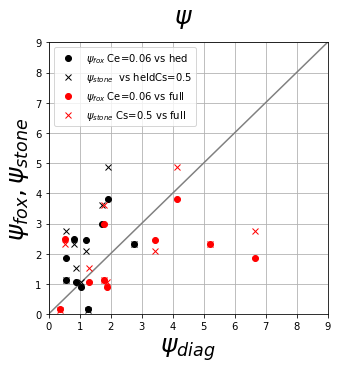

In [10]:
fig, ax = plt.subplots(1,1, figsize=(5,5), sharey=False, squeeze=True) #16,7 for 5
fig.suptitle(r'$ \psi $', fontsize=25)
x = np.linspace(0,10,10)
y = x
ax.plot(x,y, color='grey')
ax.set_ylim(0,9)
ax.set_xlim(0,9)
ax.plot(psi_diag_held.mean(dim='depthi'), psi_fox_brg.mean(dim='depthi'), 'o', color='black', label=r'$\psi_{fox} $ Ce=0.06 vs hed')
ax.plot(psi_diag_held.mean(dim='depthi'), psi_stone_brg.mean(dim='depthi'), 'x', color='black', label=r'$\psi_{stone}$  vs held'+f'Cs={cs}')
ax.plot(psi_diag_full.mean(dim='depthi'), psi_fox_brg.mean(dim='depthi'), 'o', color='red', label=r'$\psi_{fox} $ Ce=0.06 vs full')
ax.plot(psi_diag_full.mean(dim='depthi'), psi_stone_brg.mean(dim='depthi'), 'x', color='red', label=r'$\psi_{stone}$'+f' Cs={cs} vs full')
ax.set_xlabel(r'$\psi_{diag}$', fontsize=25)
ax.set_ylabel(r'$\psi_{fox}, \psi_{stone}$', fontsize=25)
ax.legend()
#plt.legend(fontsize=12, loc='upper right')
plt.grid()
plt.savefig(f'{fig_path}/param_vs_diag/psi_diag_vs_pram_manu_nov22.png', dpi=250, format='png', bbox_inches='tight')

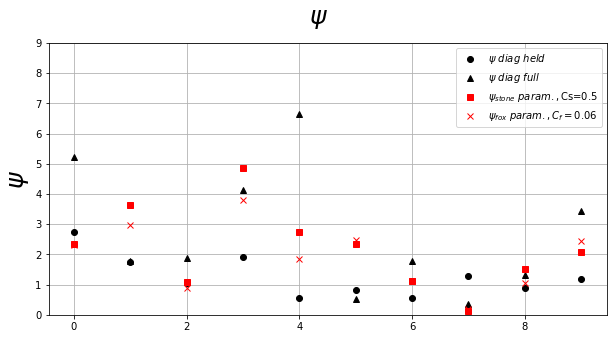

In [11]:
fig, ax = plt.subplots(1,1, figsize=(10,5), sharey=False, squeeze=True) #16,7 for 5
fig.suptitle(r'$ \psi $', fontsize=25)
x = np.linspace(0,10,10)
y = x
# ax.plot(x,y, color='grey')
ax.set_ylim(0,9)
# ax.set_xlim(0,9)
ax.plot(psi_diag_held.mean(dim='depthi'), 'o', color='black', label=r'$\psi ~ diag ~held$')
ax.plot(psi_diag_full.mean(dim='depthi'), '^', color='black', label=r'$\psi  ~diag ~full$')
ax.plot(psi_stone_brg.mean(dim='depthi'), 's', color='red', label=r'$\psi_{stone} ~param.,$'+f'Cs={cs}')
ax.plot(psi_fox_brg.mean(dim='depthi'), 'x', color='red', label=r'$\psi_{fox} ~param., C_f=0.06 $')
# ax.set_xlabel(r'$\psi_{diag}$', fontsize=25)
ax.set_ylabel(r'$\psi$', fontsize=25)
ax.legend()
#plt.legend(fontsize=12, loc='upper right')
plt.grid()
plt.savefig(f'{fig_path}/param_vs_diag/psi_align_manu_nov22.png', dpi=250, format='png', bbox_inches='tight')

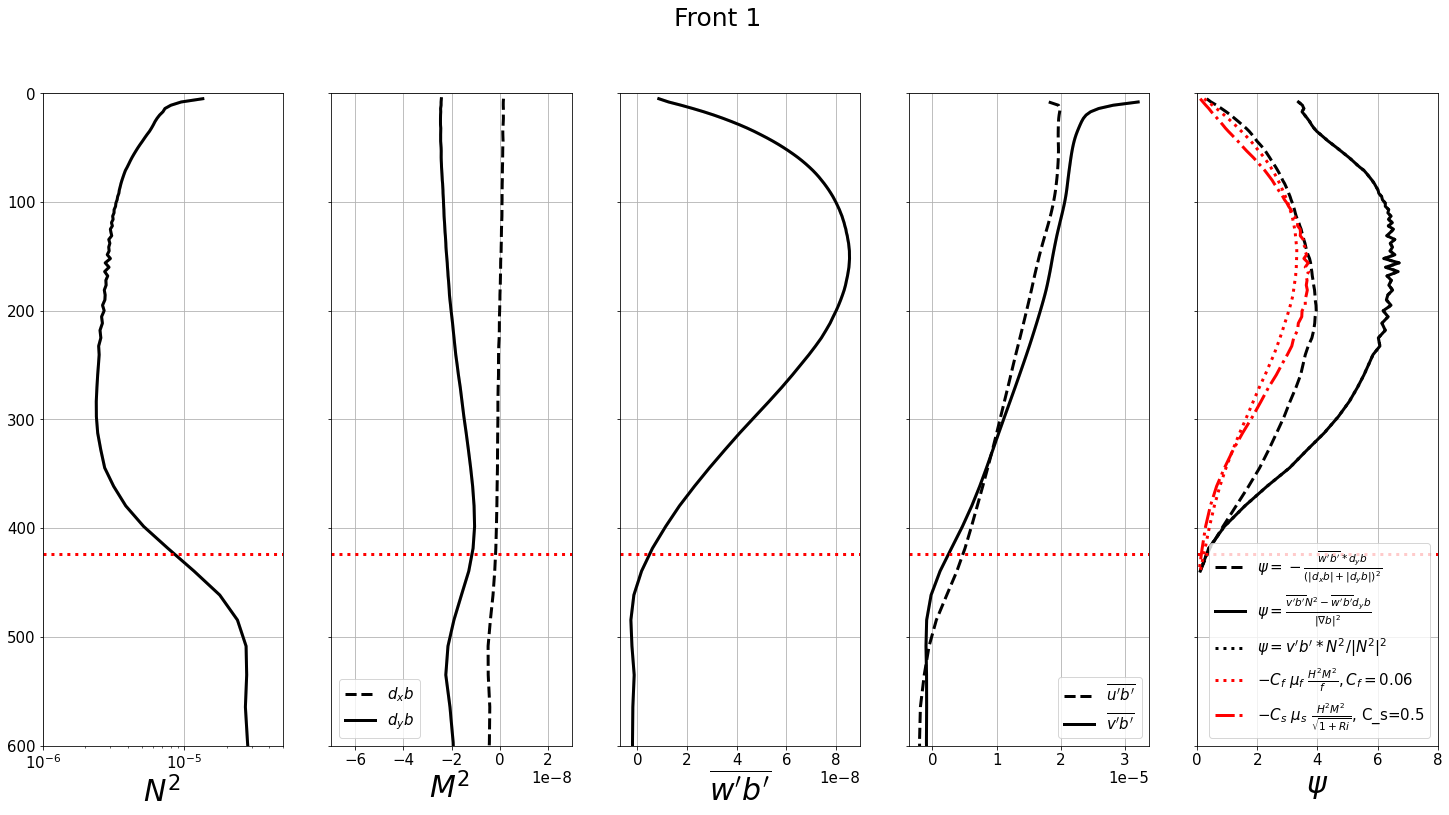

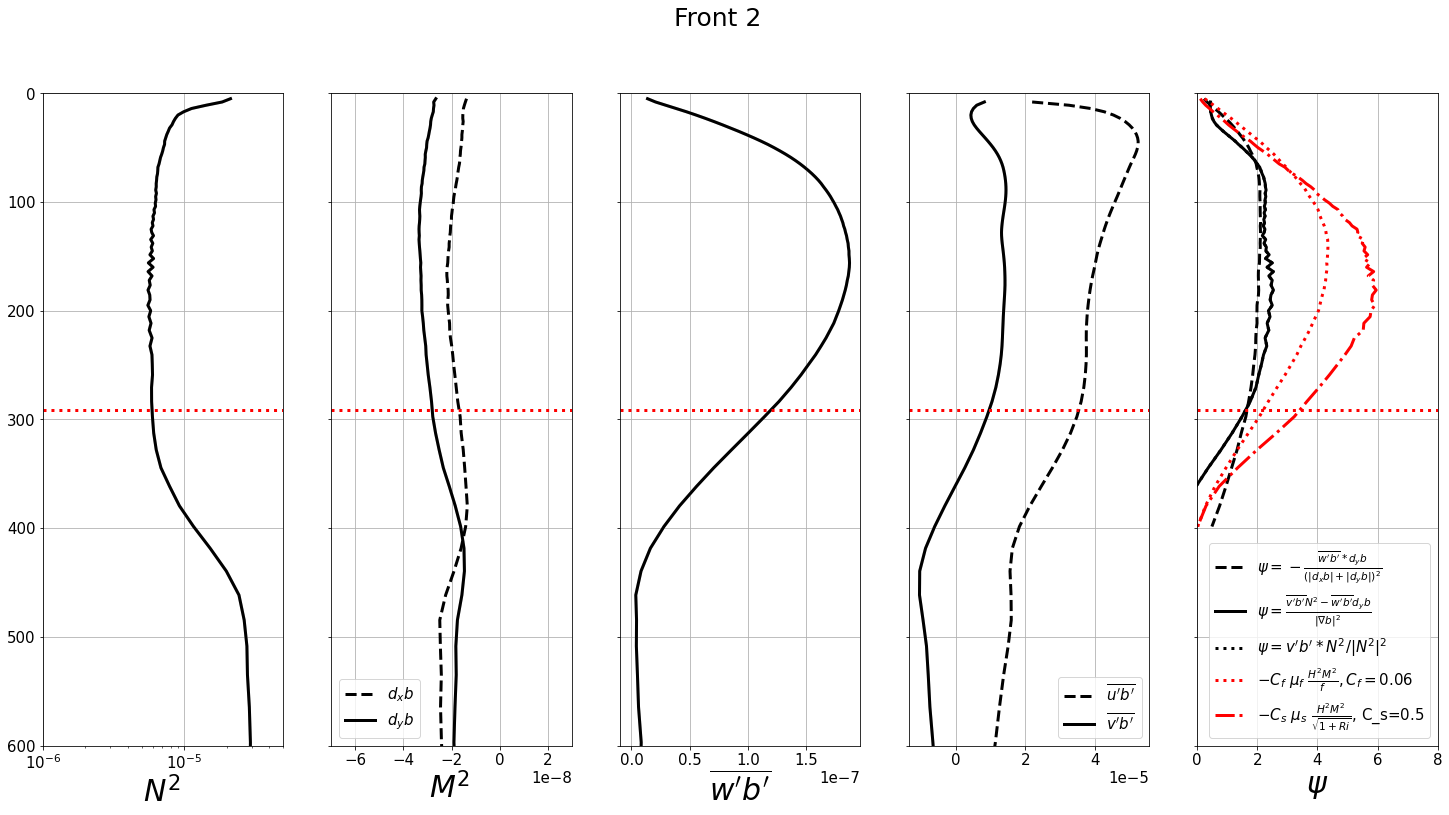

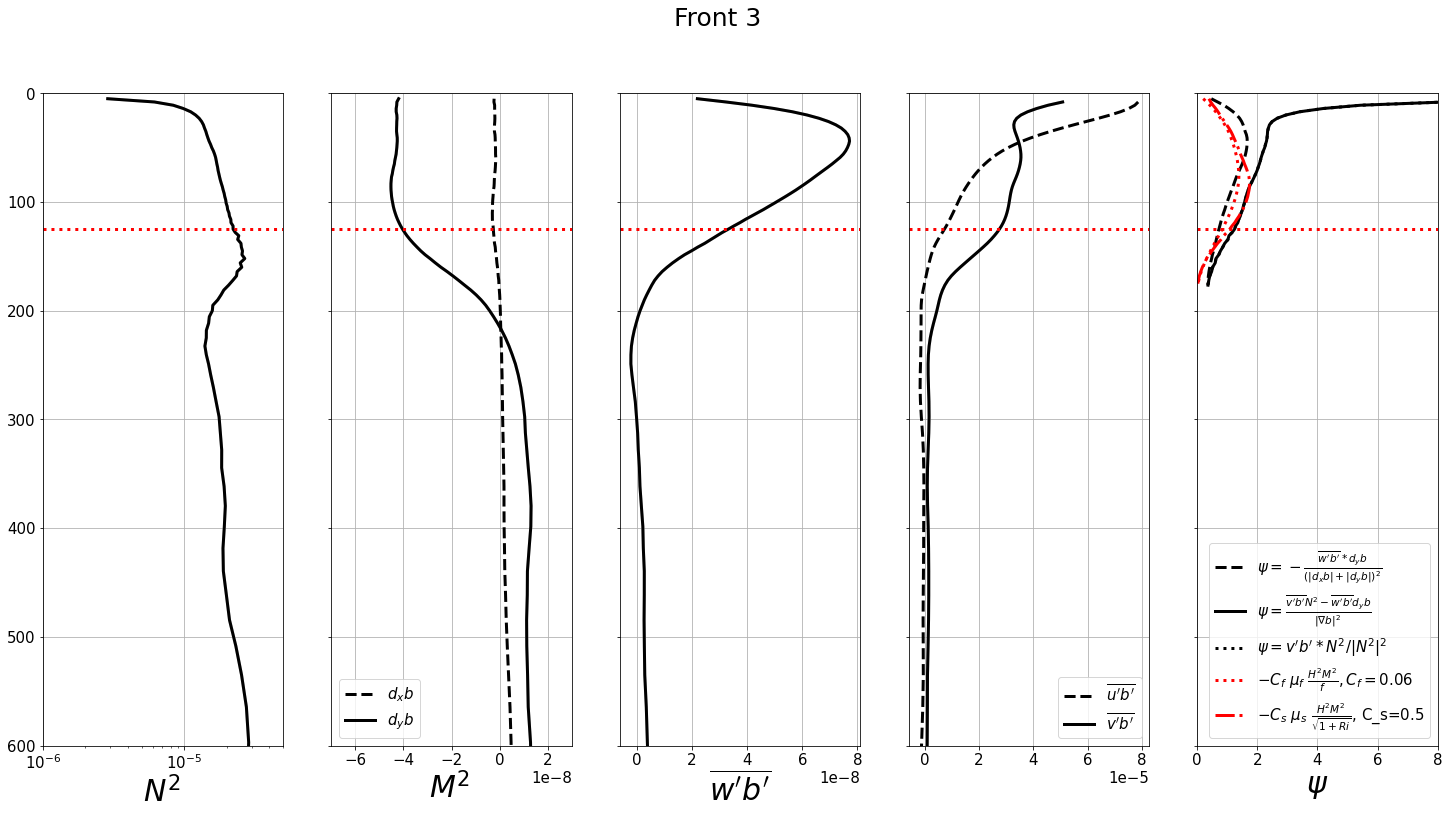

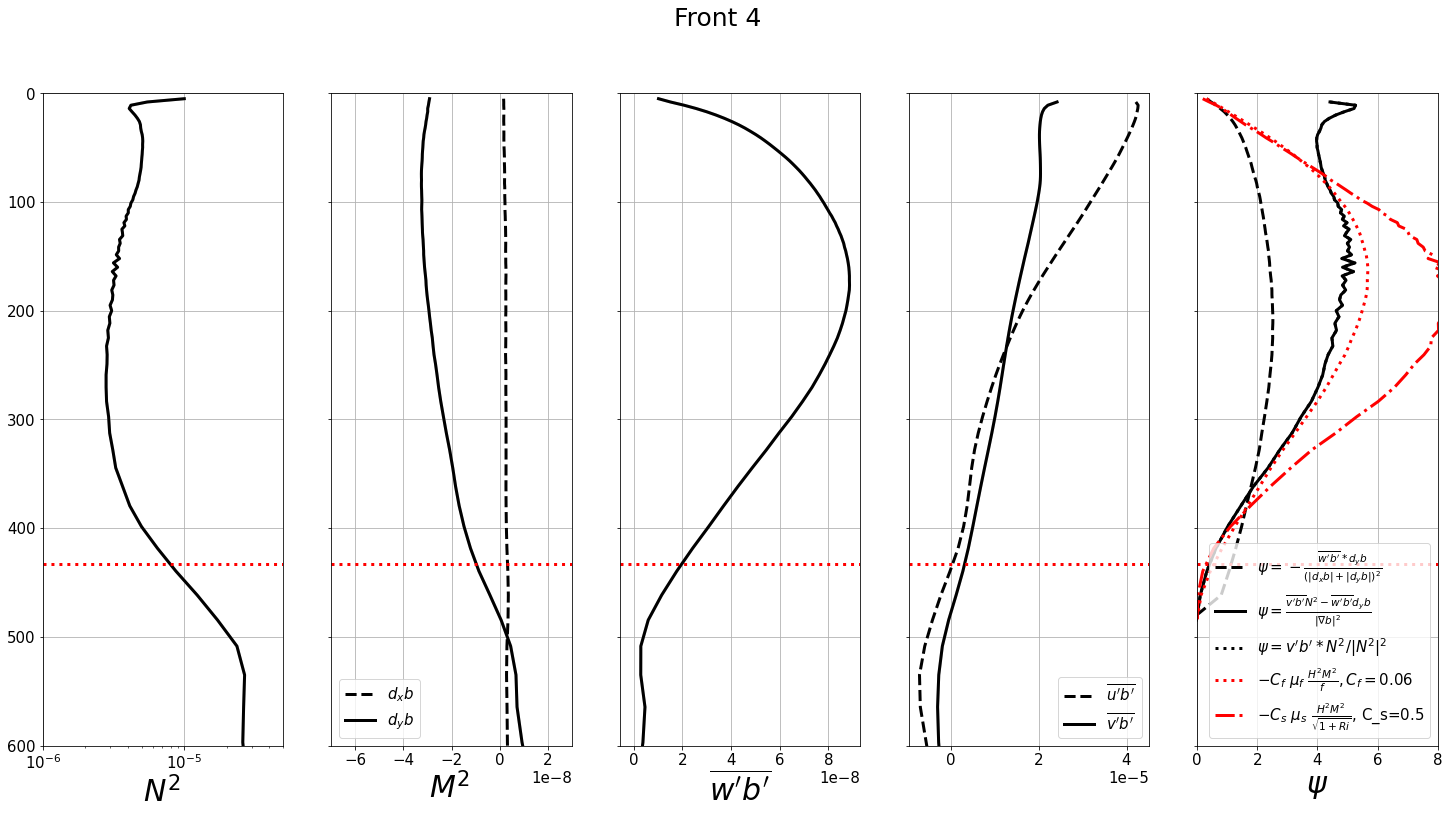

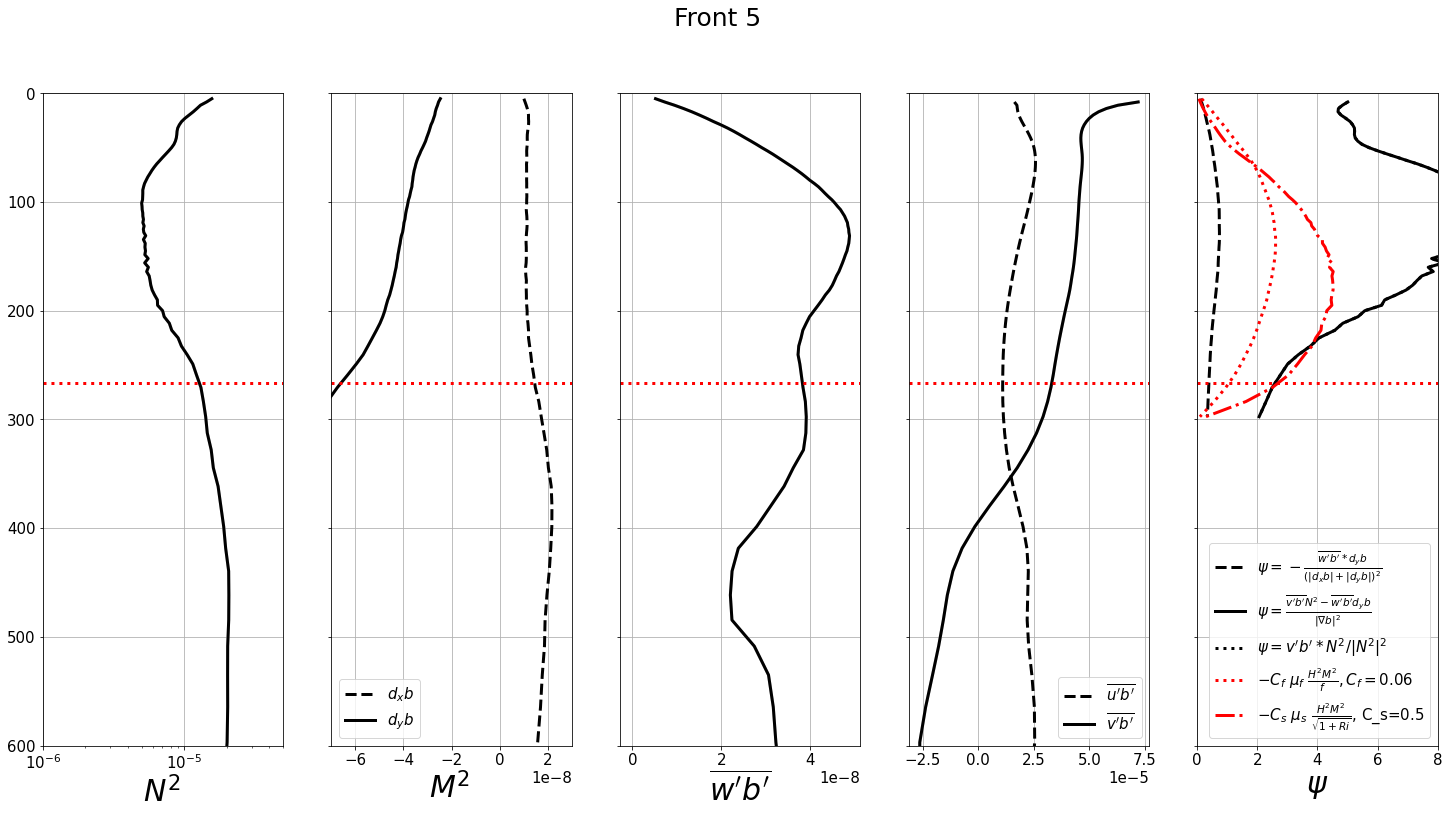

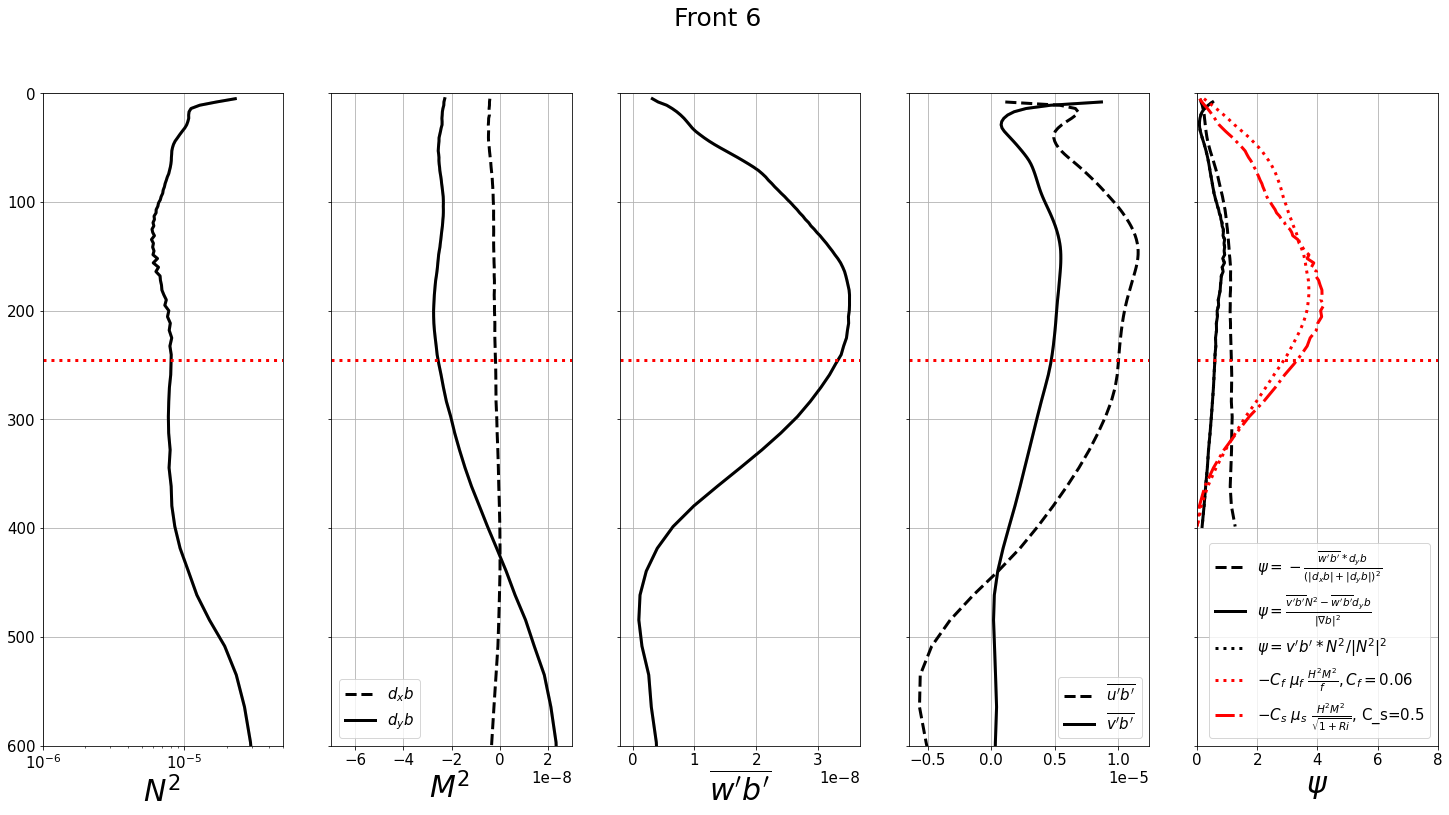

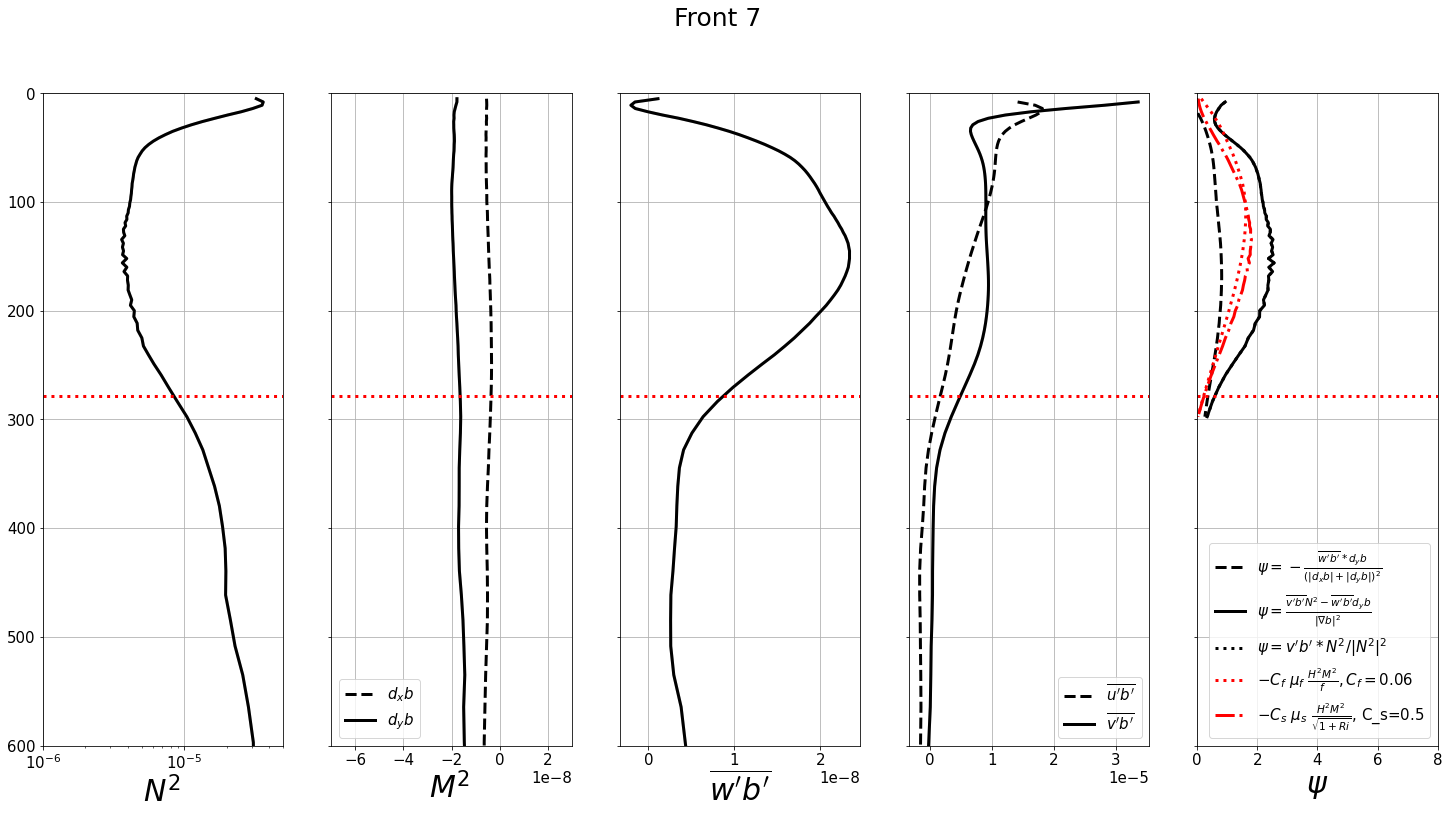

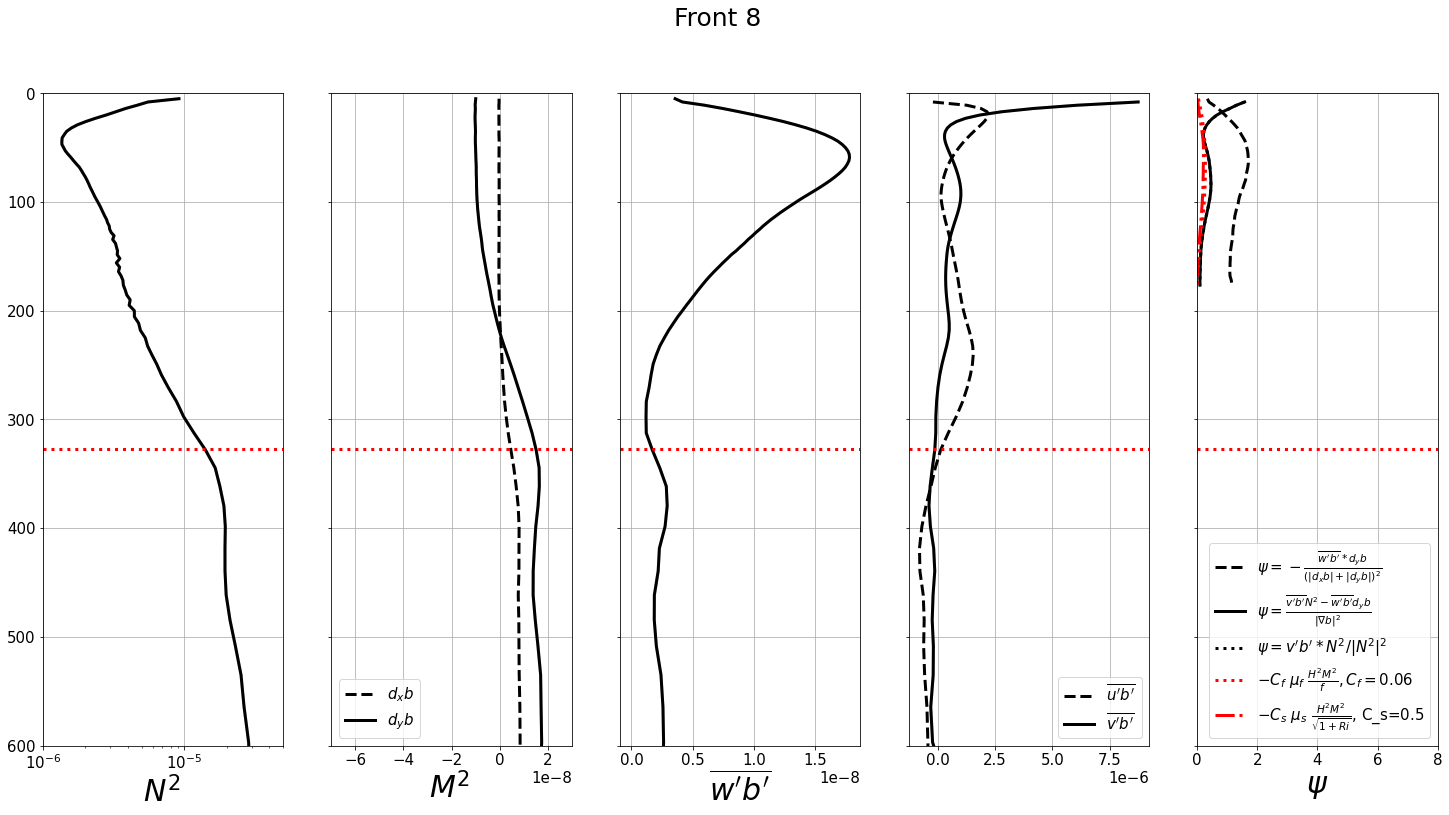

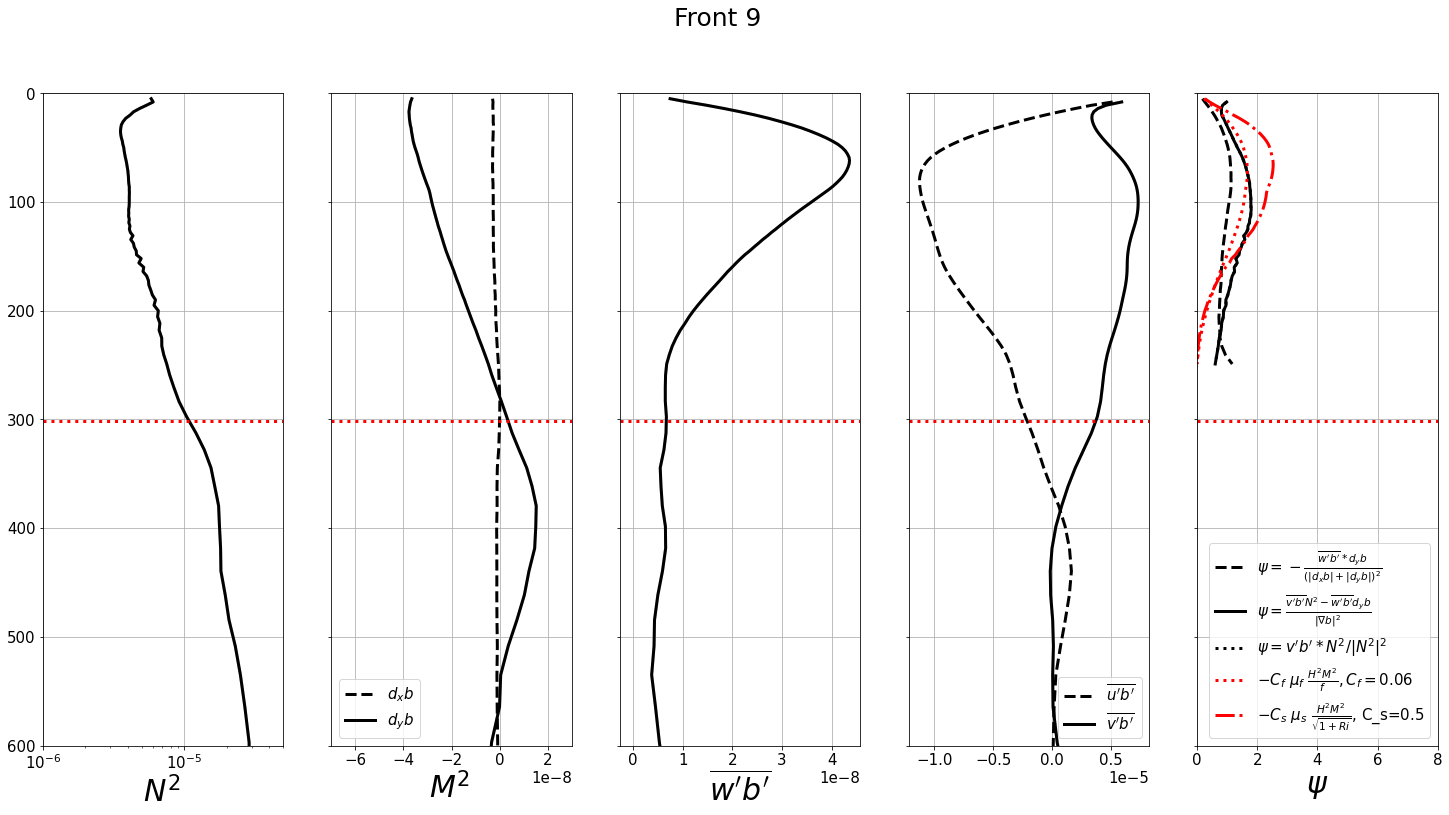

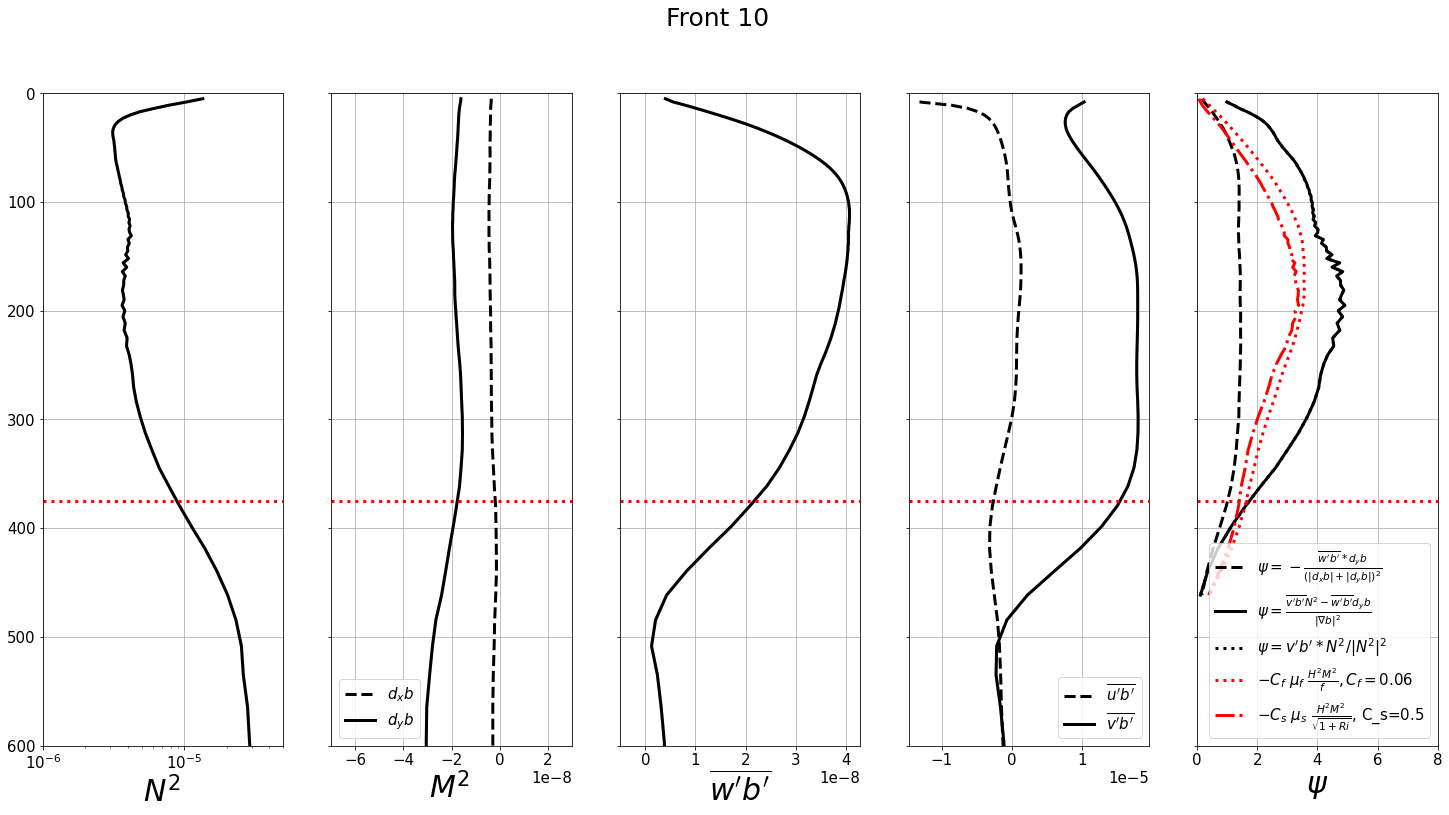

In [12]:
# m2y_masked = m2y.mean(dim=dim).data
for ii in np.arange(shape[0]):
    # ii=0
    B = ds_F.isel(fronts=ii)
    n2 = B.n2
    wb = B.wb
    vb = B.vb
    ub = B.ub
    m2 = B.m2
    m2x = B.m2x
    m2y = B.m2y
    Mld = B.mld

    # psi_held        = eva.calc_streamfunc_held_schneider(wb, m2x, m2y)
    # grad_b          = eva.calc_abs_grad_b(m2x=m2x, m2y= m2y, n2=n2)
    # psi_full        = eva.calc_streamfunc_full(wb, m2y, vb, n2, grad_b)
    # psi_traditional = eva.calc_streamfunc(vb,n2)
    fig, ax = plt.subplots(1,5, figsize=(25,12), sharey=True, squeeze=True) #16,7 for 5
    fig.suptitle(rf'Front {ii+1}', fontsize=25)
    ylim = np.array([600, 0])
    lw   = 3
    fs   = 30
    fl   = 15
    i=0
    ax[i].semilogx(n2.squeeze(), depthi, color='lightgrey', lw=lw)
    ax[i].plot(n2, depthi, 'black', lw=lw)
    ax[i].axhline(Mld, color='r', ls=':', lw=lw)

    ax[i].set_ylim(ylim) # type: ignore
    ax[i].set_xlim(1e-6,5e-5)
    # ax[i].set_xlim(0,1.5e-5)
    ax[i].set_xlabel('$N^2$ ', fontsize=fs)
    ax[i].grid()
    ax[i].tick_params(labelsize=fl)
    ax[i].xaxis.get_offset_text().set_fontsize(fl)

    i=1
    ax[i].plot(m2y.squeeze(), depthi, color='lightgrey', lw=lw)
    ax[i].plot(m2x, depthi, ls='dashed', color='black', lw=lw, label='$d_x b$')
    ax[i].plot(m2y, depthi, 'black', lw=lw, label='$d_y b$')
    ax[i].axhline(Mld, color='r', ls=':', lw=lw)
    ax[i].set_ylim(ylim) # type: ignore
    ax[i].set_xlim(-7e-8,3e-8)
    ax[i].set_xlabel('$M^2$ ', fontsize=fs)
    ax[i].legend(loc='lower left', fontsize=15)
    ax[i].grid()
    ax[i].tick_params(labelsize=fl)
    ax[i].xaxis.get_offset_text().set_fontsize(fl)

    i=2
    ax[i].plot(wb.squeeze(), depthi, color='lightgrey',lw=lw)
    ax[i].plot(wb, depthi, 'black', lw=lw)
    ax[i].axhline(Mld, color='r', ls=':', lw=lw)
    ax[i].set_ylim(ylim) # type: ignore
    # ax[i].set_xlim(-0.5e-7,2e-7)
    ax[i].set_xlabel(r"$\overline{w'b'}$ ", fontsize=fs)
    ax[i].grid()
    ax[i].tick_params(labelsize=fl)
    ax[i].xaxis.get_offset_text().set_fontsize(fl)

    i = 3
    ax[i].plot(vb.squeeze(), depthi, color='lightgrey',lw=lw)
    ax[i].plot(ub, depthi, color='black', lw=lw, ls='dashed', label = r"$\overline{u'b'}$")
    ax[i].plot(vb, depthi, color='black', lw=lw, label = r"$\overline{v'b'}$")
    ax[i].axhline(Mld, color='r', ls=':', lw=lw) 
    ax[i].set_ylim(ylim) # type: ignore
    #ax[i].set_xlim(-0.5e-7,2e-7)
    # ax[i].set_xlabel(r"$\overline{v'b'} & \overline{u'b'} $ ", fontsize=fs)
    ax[i].legend(loc='lower right', fontsize=15)
    ax[i].grid()
    ax[i].tick_params(labelsize=fl)
    ax[i].xaxis.get_offset_text().set_fontsize(fl)

    i=4
    # ax[i].plot(psi.squeeze(), depthc, color='lightgrey')
    ax[i].plot(psi_diag_held.isel(fronts=ii), psi_diag_held.depthi, 'black', lw=lw, ls='dashed', label=r"$ \psi = - \frac{\overline{w'b'} * d_y b }{ (|d_x b|+|d_y b|)^2 }$")
    ax[i].plot(psi_diag_full.isel(fronts=ii), psi_diag_full.depthi, 'black', lw=lw,  label=r"$ \psi = \frac{\overline{v'b'}  N^2 - \overline{w'b'}  d_y b}{ |\nabla b|^2 }$")
    ax[i].plot(psi_diag_traditional.isel(fronts=ii), psi_diag_traditional.depthi, 'black', ls=':', lw=lw, label=r"$ \psi = v'b' * N^2 / |N^2|^2 $")
    ax[i].plot(psi_fox_brg.isel(fronts=ii), psi_fox_brg.depthi, 'red', lw=lw, ls='dotted', label=r'$- C_f ~ \mu_f ~ \frac{H^2 M^2}{f}, C_f=0.06$')
    ax[i].plot(psi_stone_brg.isel(fronts=ii), psi_stone_brg.depthi, 'red', lw=lw, ls='-.', label=r'$-C_s ~\mu_s ~ \frac{H^2 M^2}{\sqrt{1+Ri}}$'+f', C_s={cs}')
    ax[i].axhline(Mld, color='r', ls=':', lw=lw)
    ax[i].set_ylim(ylim) # type: ignore
    ax[i].set_xlim(0,8)
    # ax[i].set_xlim(-1,5)
    ax[i].set_xlabel(r"$ \psi $", fontsize=fs)
    ax[i].legend(loc='lower right', fontsize=15)
    ax[i].grid()
    ax[i].tick_params(labelsize=fl)
    plt.savefig(f'{fig_path}/vertical_profiles/front{ii+1}structure_func_manu_mld_nov22.png', dpi=150, format='png', bbox_inches='tight')